In [1]:
# Forecasting for PM10 and CO in AQI

In [1]:
# Libraries
import pandas as pd
import pandas as pandasForSortingCSV
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout

import math
import glob
import os



In [13]:
# Upload Dataset and Sort
df = pd.read_csv('ispu_data.csv', index_col=0)
df.head(10)

,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
tanggal,,,,,,,,,
2019-01-01,29,15,7,71,13,71,O3,SEDANG,DKI2
2019-01-02,24,17,6,79,6,79,O3,SEDANG,DKI2
2019-01-03,23,16,6,65,4,65,O3,SEDANG,DKI2
2019-01-04,42,18,10,64,11,64,O3,SEDANG,DKI2
2019-01-05,54,29,16,51,20,54,PM10,SEDANG,DKI3
2019-01-06,69,34,30,105,27,105,O3,TIDAK SEHAT,DKI2
2019-01-07,71,47,16,132,25,132,O3,TIDAK SEHAT,DKI3
2019-01-08,51,22,25,143,26,143,O3,TIDAK SEHAT,DKI3
2019-01-09,61,22,28,198,21,198,O3,TIDAK SEHAT,DKI1


In [14]:
df.shape

(1076, 9)

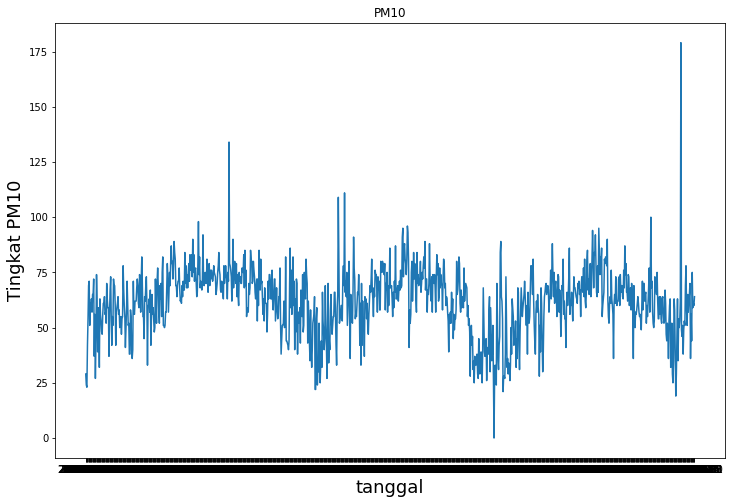

In [4]:
# PM10 Graph
plt.figure(figsize=(12,8))
plt.title("PM10")
plt.plot(df['pm10'])
plt.xlabel('tanggal', fontsize=18)
plt.ylabel('Tingkat PM10', fontsize=18)
plt.show()

In [15]:
df.describe()

,pm10,o3,no2,max
count,1076.000000,1076.000000,1076.000000,1076.000000
mean,61.869888,81.512082,25.739777,98.025093
std,15.001637,38.504181,22.025802,32.307251
min,0.000000,18.000000,3.000000,41.000000
25%,54.000000,53.000000,13.000000,76.000000
50%,63.000000,73.000000,17.000000,92.000000
75%,71.000000,100.000000,32.000000,114.000000
max,179.000000,243.000000,148.000000,243.000000


In [16]:
df = df.drop(['so2','co','o3','no2','max','critical','categori','lokasi_spku'], axis=1)
df.head()

,pm10
tanggal,
2019-01-01,29
2019-01-02,24
2019-01-03,23
2019-01-04,42
2019-01-05,54


In [72]:
dataset = df.values
dataset = dataset.astype('float32')

In [73]:
# Data Normalization

scaled_data = MinMaxScaler(feature_range=(0,1))
dataset = scaled_data.fit_transform(dataset)
dataset


array([[0.16201116],
       [0.1340782 ],
       [0.12849161],
       ...,
       [0.3407821 ],
       [0.3351955 ],
       [0.3575419 ]], dtype=float32)

In [74]:
# Spliting dataset
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

860 216


In [75]:
# Convert to Np Array
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [76]:
# Reshaping
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [77]:
# Reshape for input
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [78]:
# LSTM Model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



In [79]:
# Summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4)                 96        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [80]:
#Training Model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
858/858 - 12s - loss: 0.0115 - 12s/epoch - 14ms/step
Epoch 2/100
858/858 - 5s - loss: 0.0048 - 5s/epoch - 6ms/step
Epoch 3/100
858/858 - 5s - loss: 0.0046 - 5s/epoch - 6ms/step
Epoch 4/100
858/858 - 5s - loss: 0.0045 - 5s/epoch - 6ms/step
Epoch 5/100
858/858 - 5s - loss: 0.0044 - 5s/epoch - 6ms/step
Epoch 6/100
858/858 - 5s - loss: 0.0044 - 5s/epoch - 6ms/step
Epoch 7/100
858/858 - 5s - loss: 0.0044 - 5s/epoch - 6ms/step
Epoch 8/100
858/858 - 5s - loss: 0.0044 - 5s/epoch - 6ms/step
Epoch 9/100
858/858 - 5s - loss: 0.0044 - 5s/epoch - 5ms/step
Epoch 10/100
858/858 - 5s - loss: 0.0044 - 5s/epoch - 6ms/step
Epoch 11/100
858/858 - 5s - loss: 0.0045 - 5s/epoch - 6ms/step
Epoch 12/100
858/858 - 5s - loss: 0.0044 - 5s/epoch - 6ms/step
Epoch 13/100
858/858 - 5s - loss: 0.0044 - 5s/epoch - 6ms/step
Epoch 14/100
858/858 - 5s - loss: 0.0045 - 5s/epoch - 6ms/step
Epoch 15/100
858/858 - 5s - loss: 0.0044 - 5s/epoch - 6ms/step
Epoch 16/100
858/858 - 5s - loss: 0.0044 - 5s/epoch - 6ms/ste

In [81]:
from sklearn.metrics import mean_squared_error
# Create Predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverting Predictions
trainPredict = scaled_data.inverse_transform(trainPredict)
trainY = scaled_data.inverse_transform([trainY])
testPredict = scaled_data.inverse_transform(testPredict)
testY = scaled_data.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

7/7 [==============================] - 0s 7ms/step
Train Score: 11.90 RMSE
Test Score: 13.87 RMSE


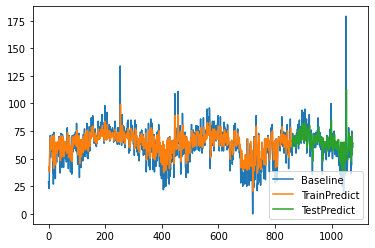

In [86]:
#PLotting

# Create Plot for train predictions
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Create Plot test predictions
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Create Plot for baseline and predictions
plt.plot(scaled_data.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Baseline', 'TrainPredict', 'TestPredict'], loc='lower right')
plt.show()


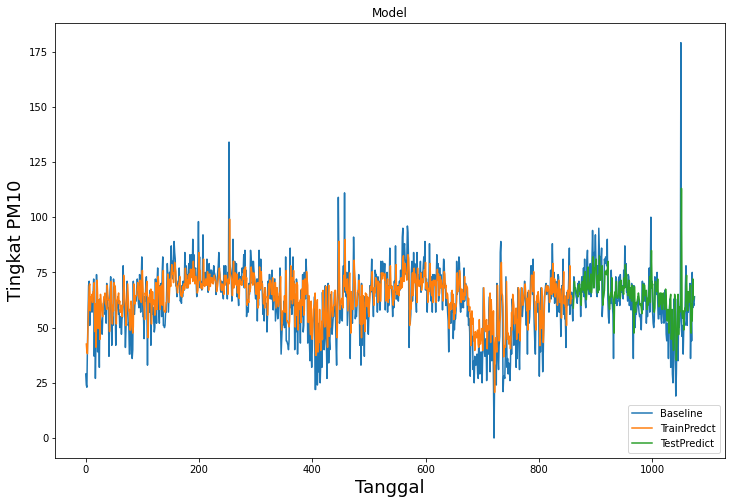

In [91]:
# Graph the Plot
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Tingkat PM10', fontsize=18)
plt.plot(scaled_data.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Baseline', 'TrainPredct', 'TestPredict'], loc='lower right')
plt.show()